In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../scripts")
import models
import pickle
from Bio import SeqIO
#import main

## Test `InteractionMatrix`

In [6]:
file = open("../data/GM12878_5k/loops_0.pickle", "rb")

In [7]:
matrices = []
for i in range(12):
    identifier, test_item = pickle.load(file)
    matrix = models.InteractionMatrix(identifier, test_item)
    matrices.append(matrix)

data for 101255000,101400000 not found in interaction matrix (101400000,101255000)
data for 101255000,101401000 not found in interaction matrix (101400000,101255000)
data for 101255000,101402000 not found in interaction matrix (101400000,101255000)
data for 101255000,101403000 not found in interaction matrix (101400000,101255000)
data for 101255000,101404000 not found in interaction matrix (101400000,101255000)
data for 101256000,101400000 not found in interaction matrix (101400000,101255000)
data for 101256000,101401000 not found in interaction matrix (101400000,101255000)
data for 101256000,101402000 not found in interaction matrix (101400000,101255000)
data for 101256000,101403000 not found in interaction matrix (101400000,101255000)
data for 101256000,101404000 not found in interaction matrix (101400000,101255000)
data for 101257000,101400000 not found in interaction matrix (101400000,101255000)
data for 101257000,101401000 not found in interaction matrix (101400000,101255000)
data

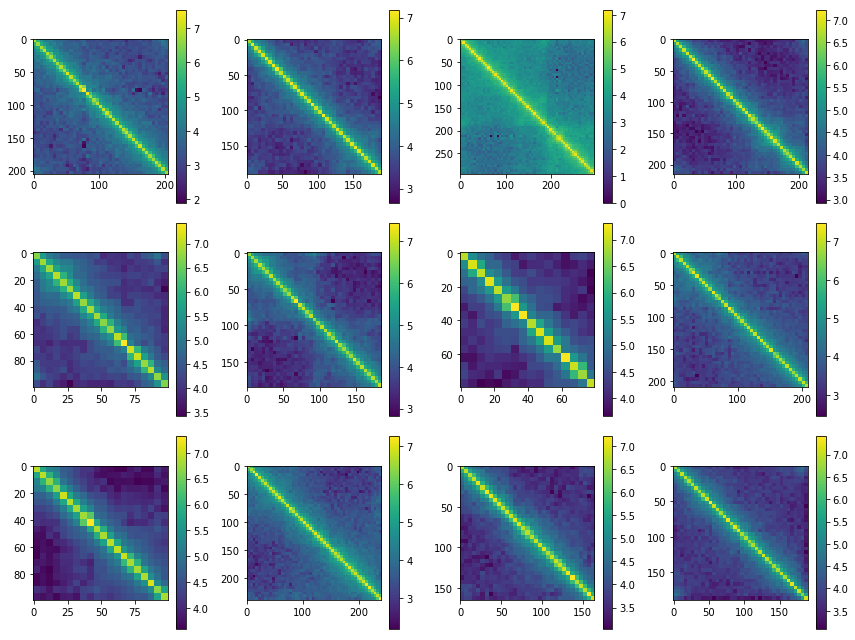

In [8]:
resolution = 1000

plt.figure(figsize=(12, 9))
for i, matrix in enumerate(matrices):
    plt.subplot(3, 4, i + 1)
    r = matrix.range()
    interpolated = np.zeros(((r[1] - r[0]) // resolution, (r[1] - r[0]) // resolution))
    for x in range(interpolated.shape[0]):
        for y in range(interpolated.shape[1]):
            interpolated[x,y] = matrix.value_at(x * resolution + r[0], y * resolution + r[0])

    plt.imshow(np.log(1 + interpolated))
    plt.colorbar()
plt.tight_layout()
plt.show()

### Test out bivariate interpolation (11/27/18)

In [67]:
from scipy import interpolate
interp_resolution = 500

In [68]:
matrix = matrices[0]
r = matrix.range()

In [73]:
# Produce x, y, z
loci = list(matrix.data.items())
loci_x, loci_y = np.meshgrid(np.arange(r[0], r[1], matrix.resolution), np.arange(r[0], r[1], matrix.resolution))
loci_coords = np.hstack([loci_x.reshape(-1, 1), loci_y.reshape(-1, 1)])
loci_values = np.array([matrix.value_at(x, y) for x, y in loci_coords])

In [77]:
indexes = np.arange((r[1] - r[0]) // interp_resolution)
grid_x, grid_y = np.meshgrid(indexes * interp_resolution + r[0], indexes * interp_resolution + r[0])
grid = np.hstack([grid_x.reshape(-1, 1), grid_y.reshape(-1, 1)])

/Users/venkatesh-sivaraman/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in maximum
  app.launch_new_instance()


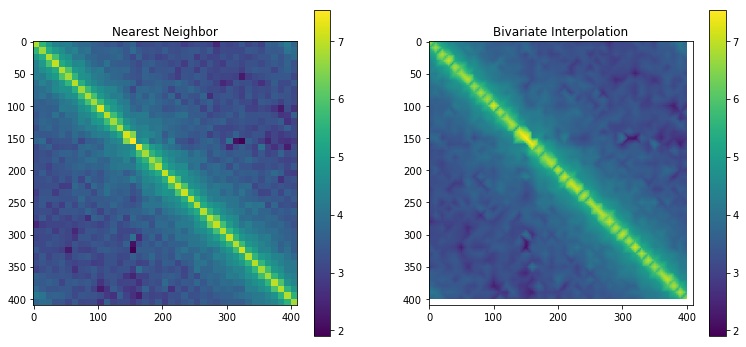

In [80]:
#interp_f = interpolate.griddata(loci_coords, loci_values, method='cubic')
interpolated = interpolate.griddata(loci_coords, loci_values, grid, method='linear')
interpolated = interpolated.reshape((r[1] - r[0]) // interp_resolution, (r[1] - r[0]) // interp_resolution)

nearest = np.zeros(((r[1] - r[0]) // interp_resolution, (r[1] - r[0]) // interp_resolution))
for x in range(nearest.shape[0]):
    for y in range(nearest.shape[1]):
        nearest[x,y] = matrix.value_at(x * interp_resolution + r[0], y * interp_resolution + r[0])

plt.figure(figsize=(13, 6))
plt.subplot(1, 2, 1)
plt.imshow(np.log(1 + np.maximum(0, nearest)))
plt.colorbar()
plt.title("Nearest Neighbor")
plt.subplot(1, 2, 2)
plt.imshow(np.log(1 + np.maximum(0, interpolated)))
plt.colorbar()
plt.title("Bivariate Interpolation")
plt.show()

In [47]:
file.close()

## Test `Sequence`

In [53]:
seq_records = SeqIO.parse("../data/loop_sequences_GM12878.fasta", "fasta")

In [54]:
histone_file = open("../data/epigenomic_tracks/GM12878.pickle", "rb")
histone_mods = []
for i, record in enumerate(seq_records):
    identifier, h_mods = pickle.load(histone_file)
    histone_mods.append(models.Sequence(identifier, str(record.seq), h_mods))
    if i == 12:
        break

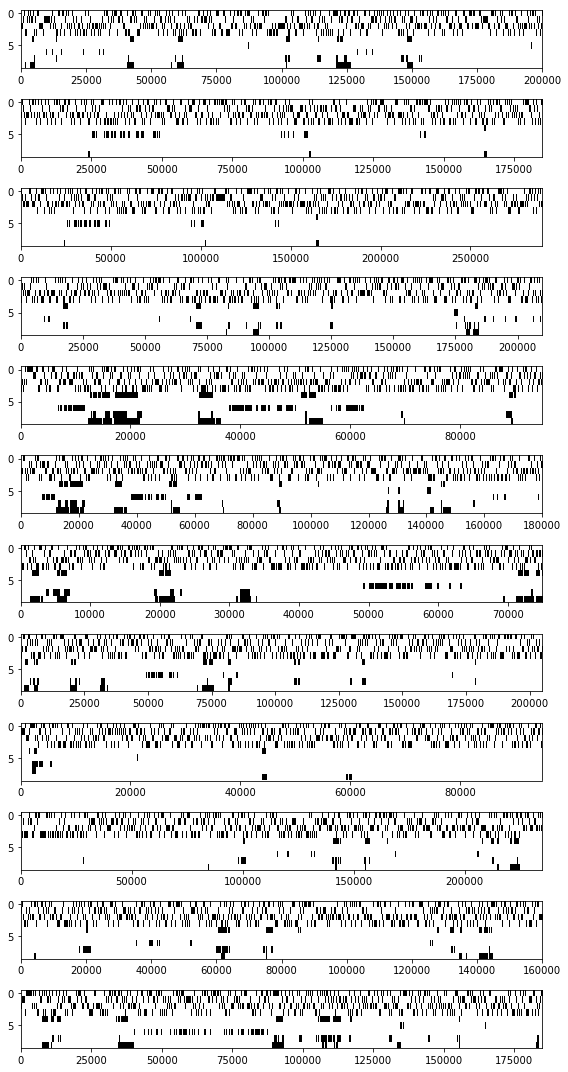

In [65]:
plt.figure(figsize=(8, 15))
for i in range(12):
    plt.subplot(12, 1, i + 1)
    mat = histone_mods[i].to_array() # Produces numpy arrays where each column is a feature vector
    plt.imshow(mat, cmap='Greys', aspect='auto')
    
plt.tight_layout()
plt.show()